In [1]:
# Alex Rios 801320278
# Assignment1 Summer 2025

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# go ahead load and find the path for my dataset 
df = pd.read_csv('../Datasets/HW1.csv')
df.head() # To get first n rows from the dataset default value of n is 5
M=len(df)
M
print(f"Loaded {M} samples.") # rather than a random "100" I will add addtional info on what 100 means. 
print(df.head()) # from the df.head() I went ahead and added print to make it show our first 4 rows 


Loaded 100 samples.
         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


Final Hypothesis:
h(x) = 1.0614 + -1.2948·X1 + 1.1735·X2 + 0.3092·X3


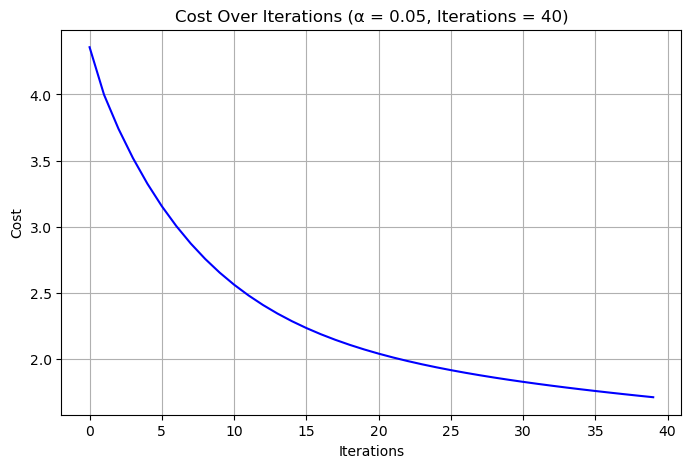


Predictions for future points:
(1, 1, 1) → 1.2494
(2, 0, 4) → -0.2913
(3, 2, 1) → -0.1666


In [2]:
# Define learning rate and iterations 
# We can adjust the values between 0.1 and 0.01 — starting with 0.05 and 40 iterations
Iterations = 40 
Alpha = 0.05    

# Gradient Descent Function 
def GradientDescent(X, Y, Theta, Alpha, Iterations):  
    M = len(X)  # number of training examples
    CostHistory = []  # Track cost at each iteration

    for i in range(Iterations):
        Predictions = X @ Theta
        Errors = Predictions - Y
        Gradient = (Alpha / M) * (X.T @ Errors)
        Theta = Theta - Gradient
        CostHistory.append(ComputeCost(X, Y, Theta))

    return Theta, CostHistory

# Cost Function 
def ComputeCost(X, Y, Theta): 
    M = len(Y)
    Predictions = X @ Theta
    Errors = Predictions - Y
    SquaredErrors = Errors ** 2
    return (1 / (2 * M)) * np.sum(SquaredErrors)

# Get all features and target
X = df[["X1", "X2", "X3"]].values
Y = df["Y"].values.reshape(-1, 1)

# Add bias column (intercept)
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Start with zero-initialized parameters
Theta = np.zeros((X.shape[1], 1))

# Run training with gradient descent
Theta, CostHistory = GradientDescent(X, Y, Theta, Alpha, Iterations)

# Show final model
print("Final Hypothesis:")
print(f"h(x) = {Theta[0][0]:.4f} + {Theta[1][0]:.4f}·X1 + {Theta[2][0]:.4f}·X2 + {Theta[3][0]:.4f}·X3")

# Plot Loss Over Iterations 
plt.figure(figsize=(8, 5))
plt.plot(range(Iterations), CostHistory, color="blue")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title(f"Cost Over Iterations (α = {Alpha}, Iterations = {Iterations})")
plt.grid(True)
plt.show()

# Prediction function
def Predict(X_future, Theta):
    X_new = np.hstack((np.ones((X_future.shape[0], 1)), X_future))
    return X_new @ Theta  

# Predict on New Data Points 
NewPoints = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
Predictions = Predict(NewPoints, Theta) 

# Display Predictions 
print("\nPredictions for future points:")
for i, Pred in enumerate(Predictions):
    x1, x2, x3 = NewPoints[i]  
    print(f"({x1}, {x2}, {x3}) → {Pred[0]:.4f}")
